# Results from binary classification

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline
import datetime as dt

We have multiple options for the choice of colors. [Claus O. Wilke](https://clauswilke.com/dataviz/color-pitfalls.html) defines a few colors that are suitable for a wide audience (including people with a color-vision deficiency). 

* orange #E69F00
* sky blue #56B4E9
* bluish green #009E73
* yellow #F0E442
* blue #0072B2
* vermilion #D55E00
* reddish purple #CC79A7
* black #000000

In [2]:
blue = '#0072B2'
bluegreen = '#009E73'
yellow = '#F0E442'
skyblue = '#56B4E9'
orange = '#E69F00'
vermilion = '#D55E00'

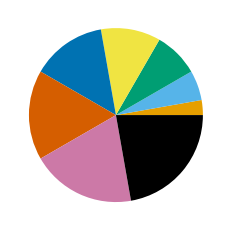

In [3]:
wedges = plt.pie(
    [1,2,3,4,5,6,7,8],
    colors = ["#E69F00",skyblue,"#009E73",yellow,"#0072B2","#D55E00","#CC79A7","#000000"]
)

## Importing shapefiles

First thing we do is to import the NUTS 3 level shapefiles from Eurostat, available at [Eurostat](https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts#nuts21).

In [4]:
gdf_nuts3 = gpd.read_file(
    'data/NUTS_RG_01M_2021_3857_LEVL_3.shp.zip',
    crs = "EPSG:4326"
)

In [5]:
# Filter out all countries except Norway
gdf_NOnuts3 = gdf_nuts3[gdf_nuts3.CNTR_CODE.str.contains('NO')]
# We manually filter out Svalbard and Jan Mayen as we are not interested in them
gdf_NOnuts3 = gdf_NOnuts3.query('FID != "NO0B1" and FID != "NO0B2"')
# Return to sequential index from 0 to 13
gdf_NOnuts3 = gdf_NOnuts3.reset_index()
# Set the coordinate reference system to EPSG:4326 - same as our twitter data. 
gdf_NOnuts3 = gdf_NOnuts3.to_crs("EPSG:4326")

## Twitter data

We start by simply loading the data from our csv file

In [6]:
df_twitter = pd.read_csv(
    "data/third_rendition_geolocated_anonymous_negneutral_predict.csv",
    parse_dates=[
        'created_at'
    ]
)

### Aggregated temporal analysis

In [7]:
df_twitter_monthly = pd.DataFrame(df_twitter.copy())

In [8]:
df_twitter_monthly.index = df_twitter_monthly[
    'created_at'
].dt.to_period(
    'M'
)

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Number of tweets'>

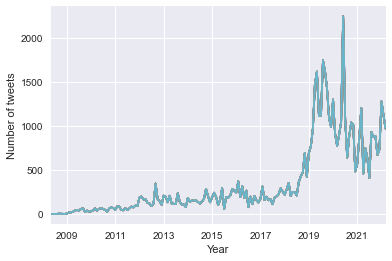

In [9]:
df_twitter_monthly.groupby(
    level=0
).count(
).plot(
    xlabel = 'Year',
    ylabel = 'Number of tweets',
    legend = None,
    #title = 'Number of tweets over time'
)

#plt.savefig('.pdf')

### With sentiment scores
We then caluclate the sentiment score and do analysis. In the binary classification, 0 = negative and 1 = non-negative

In [10]:
df_twitter_monthly_senti = pd.DataFrame(df_twitter.copy())

In [11]:
df_twitter_monthly_senti.index = df_twitter_monthly_senti['created_at'].dt.to_period('M')

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [12]:
# We first calculate the total number of values for each months
total_sentiments = df_twitter_monthly_senti.groupby(level=0).count()
total_sentiments

,Unnamed: 0,username,text,loc,created_at,like_count,quote_count,latitude,longitude,label,logits0,logits1
created_at,,,,,,,,,,,,
2008-05,1,1,1,1,1,1,1,1,1,1,1,1
2008-08,1,1,1,1,1,1,1,1,1,1,1,1
2008-09,3,3,3,3,3,3,3,3,3,3,3,3
2008-11,2,2,2,2,2,2,2,2,2,2,2,2
2008-12,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11,670,670,670,670,670,670,670,670,670,670,670,670
2021-12,734,734,734,734,734,734,734,734,734,734,734,734
2022-01,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278


In [13]:
# then next, we calculate the sum of the label values, which will correspond to the total amount of non-negative tweets
average_sentiments = df_twitter_monthly_senti.groupby(level=0).sum()
average_sentiments

,Unnamed: 0,username,like_count,quote_count,latitude,longitude,label,logits0,logits1
created_at,,,,,,,,,
2008-05,7,627034,0,0,59.902747,5.298615,1,-2.627769,2.606998
2008-08,6,5635,0,0,59.913330,10.738970,1,-2.316991,1.911707
2008-09,12,2321610,0,0,179.729408,26.776555,3,-5.588559,4.948876
2008-11,3,1362430,0,0,120.788611,10.651838,1,-1.014005,1.220520
2008-12,0,5635,0,0,59.913330,10.738970,1,-1.219448,1.031650
...,...,...,...,...,...,...,...,...,...
2021-11,36009485,311027837,1831,21,40642.638673,6594.497208,494,-538.798765,666.209799
2021-12,39964465,372096514,1935,32,44324.545989,7180.658089,517,-411.515818,571.939871
2022-01,70869573,629328979,4336,79,77179.430812,12143.909558,951,-1106.050147,1359.270492


In [14]:
# 1 = positive, 0 = negative 
# the amount of negative sentiments is calculated by the total amount of sentiments minus the amount of non-negative
# the amount of non-negative is calculated before
df_twitter_monthly_senti['negative_sentiment'] = total_sentiments['label'] - average_sentiments['label']
df_twitter_monthly_senti['non-negative_sentiment'] = average_sentiments['label']

In [15]:
df_twitter_monthly_senti

,Unnamed: 0,username,text,loc,created_at,like_count,quote_count,latitude,longitude,label,logits0,logits1,negative_sentiment,non-negative_sentiment
created_at,,,,,,,,,,,,,,
2008-12,0,5635,NYHET: Vil heller vindkraft,Oslo,2008-12-08 07:25:53+00:00,0,0,59.913330,10.738970,1,-1.219448,1.031650,0,1
2008-11,1,681215,Vindkraft mulighet : Vindmølleparker vekker st...,Bergen,2008-11-25 05:33:07+00:00,0,0,60.394306,5.325919,0,0.236792,-0.005840,1,1
2008-11,2,681215,Vil spreie vindturbinar halve kommunen : Det p...,Bergen,2008-11-18 09:33:01+00:00,0,0,60.394306,5.325919,1,-1.250796,1.226361,1,1
2008-09,3,627034,Fitjar i kamp vindm Saman sju andre vindm ..,Fitjar,2008-09-17 16:51:10+00:00,0,0,59.902747,5.298615,1,-1.468212,1.202831,0,3
2008-09,4,743983,lyst eget vindkraftverk:,Oslo,2008-09-06 10:16:18+00:00,0,0,59.913330,10.738970,1,-2.378077,2.324068,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03,58181,867560,– Regjeringen en Ole Brumm-tilnærming grønn in...,Oslo,2022-03-28 07:42:08+00:00,10,0,59.913330,10.738970,1,-0.913186,1.232684,230,740
2022-03,58182,110160,Fosen vind nær Trondheim Norge bygget Europas ...,Oslo,2022-03-28 07:25:22+00:00,0,0,59.913330,10.738970,0,0.806501,-0.492145,230,740
2022-03,58183,33845,Det godt se vinden snur vindturbiner kjernekra...,Odda,2022-03-28 07:14:26+00:00,4,0,60.067925,6.546932,0,2.612614,-2.257843,230,740


In [16]:
df_twitter_monthly_senti = df_twitter_monthly_senti.rename(columns={'created_at':'year_month'}).sort_values('year_month')

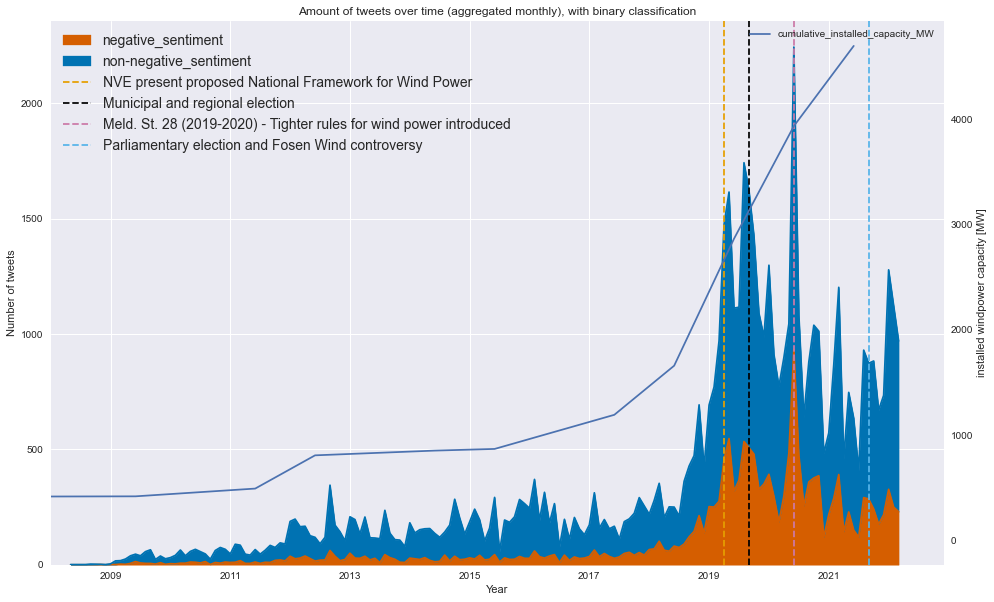

In [17]:

xs = [0,100]
fig, ax = plt.subplots(figsize=(16,10))

ax2 = ax.twinx()
df_twitter_monthly_senti.plot.area(
    ax=ax,
    y = ['negative_sentiment','non-negative_sentiment'],
    title = 'Amount of tweets over time (aggregated monthly), with binary classification',
    color = [vermilion,blue]
)

ax.axvline(
    dt.datetime(2019, 4, 1),
    color="#E69F00",
    label='NVE present proposed National Framework for Wind Power',
    linestyle = "--"
)

ax.axvline(
    dt.datetime(2019, 9, 1),
    color="#000000",
    label='Municipal and regional election',
    linestyle = "--"
)

ax.axvline(
    dt.datetime(2020, 6, 1),
    color="#CC79A7",
    label='Meld. St. 28 (2019-2020) - Tighter rules for wind power introduced',
    linestyle = "--"
)

ax.axvline(
    dt.datetime(2021, 9, 1),
    color="#56B4E9",
    label='Parliamentary election and Fosen Wind controversy',
    linestyle = "--"
)

ax.legend(fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Number of tweets')

df_wp = pd.read_csv(
    'data/norway_wp_nve_250522.tsv', sep = "\t",
    parse_dates = ['Produksjon oppstart']
).groupby(
    'Produksjon oppstart',
    as_index = False
).sum(
).drop(
    0
).rename(
    columns=
    {
        'Middelproduksjon [GWh]': 'average_generation_GWh',
        'Installert effekt [MW]': 'installed_capacity_MW'
    }
).assign(
    cumulative_annually_average_production_GWh = lambda x: x.average_generation_GWh.cumsum(),
    cumulative_installed_capacity_MW = lambda x: x.installed_capacity_MW.cumsum()
)

df_wp['year'] = df_wp['Produksjon oppstart'].to_numpy().astype('datetime64[Y]')
time_adjust = pd.Timedelta(pd.to_datetime('10.06.2020', format='%d.%m.%Y') -pd.to_datetime('01.01.2020', format = '%d.%m.%Y'))
df_wp['year'] += time_adjust
df_wp.plot(
        ax=ax2,
        y = ['cumulative_installed_capacity_MW'], #, 'average_generation_GWh'],
        x = 'year'
)

ax.set_xlim([dt.date(2008, 1, 1), dt.date(2022, 12, 12)])
ax2.grid(None)
ax2.set_ylabel('installed windpower capacity [MW]')

plt.savefig('figures/tweets_over_time_monthly_agg.eps')

### Spatial analysis

In [18]:
# Transform the twitter data it into a GeoDataFrame with point geometry based on longitude and latitude.
gdf_twitter = gpd.GeoDataFrame(
    df_twitter,
    crs = "EPSG:4326",
    geometry=gpd.points_from_xy(
        df_twitter.longitude, 
        df_twitter.latitude
    )
)

In [19]:
gdf_twitter = gdf_twitter.rename(
    columns={
        "loc": "city"
    }
)

In [20]:
# Create a new list with one row for each city
gdf_twitter_grouped = gdf_twitter[gdf_twitter.city != "Longyearbyen"]
gdf_twitter_grouped = gdf_twitter.groupby(
    'city'
).first(
)

In [21]:
# Add a new column 'twitter_frequency' with the number of times each city occur.
# This amounts to the twitter frequency.
gdf_twitter_grouped[
    'twitter_frequency'
] = gdf_twitter[
    'city'
].value_counts(
)

In [22]:
# Only select the relevant columns
gdf_twitter_grouped_sorted = gdf_twitter_grouped[
    [
        "geometry",
        "twitter_frequency",
        "label"
    ]
]
gdf_twitter_grouped_sorted = gdf_twitter_grouped_sorted.reset_index()

In [23]:
gdf_twitter_grouped_sorted

,city,geometry,twitter_frequency,label
0,Adamstuen,POINT (10.73322 59.93345),1,1
1,Agdenes,POINT (9.51508 63.58289),4,0
2,Agder,POINT (8.03496 58.71944),17,1
3,Akershus,POINT (11.32017 60.03852),55,1
4,Alstahaug,POINT (12.43178 65.86742),5,0
...,...,...,...,...
591,Øvre Eiker,POINT (9.84120 59.74419),3,1
592,Øvre Årdal,POINT (7.80398 61.31004),1,1
593,Øyer,POINT (10.50400 61.32735),3,1
594,Øygarden,POINT (7.85664 58.07864),17,0


In [24]:
# Spatial joins https://geopandas.org/docs/user_guide/mergingdata.html#spatial-joins
# Basically, we add an attribute for each city related to the county the coordinate is located inside.
gdf_twitter_with_county = gdf_twitter_grouped_sorted.sjoin(
    gdf_NOnuts3, 
    how = "inner", 
    predicate = 'intersects')

# Summate the different cities within each county
gdf_frequency_county = gdf_twitter_with_county.groupby(
    'NUTS_NAME'
).sum()
gdf_frequency_county.head(5)

,twitter_frequency,label,index_right,index,LEVL_CODE,MOUNT_TYPE,URBN_TYPE,COAST_TYPE
NUTS_NAME,,,,,,,,
Agder,527,18,184,18699,69,46.0,46.0,23
Innlandet,1484,50,315,46935,189,189.0,189.0,189
Møre og Romsdal,897,28,369,61541,123,123.0,123.0,41
Nordland,983,24,360,54072,108,108.0,108.0,36
Oslo,29434,25,192,25344,96,96.0,32.0,32


In [25]:
# https://www.ssb.no/statbank/table/07459/tableViewLayout1/
gdf_frequency_county['population'] = [311134,
                                      371253,
                                      265848,
                                      240190,
                                      699827,
                                      485797,
                                      241736,
                                      474131,
                                      424832,
                                      641292,
                                      1269230]
gdf_frequency_county = gdf_frequency_county.assign(
    tweets_per_cap = lambda x: x.twitter_frequency/x.population
)
gdf_frequency_county

,twitter_frequency,label,index_right,index,LEVL_CODE,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,population,tweets_per_cap
NUTS_NAME,,,,,,,,,,
Agder,527,18,184,18699,69,46.0,46.0,23,311134,0.001694
Innlandet,1484,50,315,46935,189,189.0,189.0,189,371253,0.003997
Møre og Romsdal,897,28,369,61541,123,123.0,123.0,41,265848,0.003374
Nordland,983,24,360,54072,108,108.0,108.0,36,240190,0.004093
Oslo,29434,25,192,25344,96,96.0,32.0,32,699827,0.042059
Rogaland,3707,30,37,26566,111,74.0,74.0,37,485797,0.007631
Troms og Finnmark,620,32,152,27398,114,114.0,114.0,38,241736,0.002565
Trøndelag,5459,39,174,41760,174,116.0,116.0,58,474131,0.011514
Vestfold og Telemark,1036,21,231,26268,99,66.0,66.0,33,424832,0.002439


In [26]:
gdf_frequency_county.twitter_frequency.Oslo/gdf_frequency_county.twitter_frequency.sum()

0.5382955376737382

In [27]:
gdf_frequency_county.population.Oslo/gdf_frequency_county.population.sum()

0.12899394868826805

Oslo has almost 54% of the tweets, although only representing 13% of the population

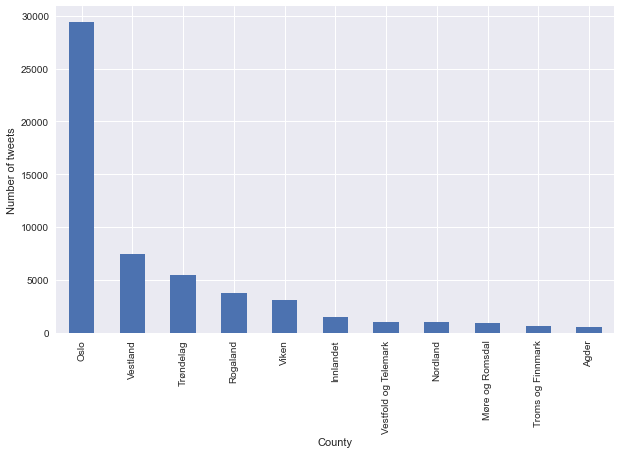

In [28]:
gdf_frequency_county.twitter_frequency.sort_values(
    ascending=False
)

#ax = gdf_frequency_county.tweets_per_cap.plot(
#    secondary_y=True
#)

gdf_frequency_county.twitter_frequency.sort_values(
    ascending=False
).plot.bar(
    legend = None,
    figsize = (10,6),
#    ax=ax
)

#plt.tick_params(axis='y', labelleft='off', labelright='on')
plt.xlabel('County')
plt.ylabel('Number of tweets')
plt.savefig('figures/tweet_frequency.png',bbox_inches='tight')



## Heat maps

In [29]:
test = gdf_twitter.copy()
test = test.drop(columns={'like_count','quote_count','username','text','Unnamed: 0'})

In [30]:
test = test.sjoin(
    gdf_NOnuts3, 
    how="inner", 
    predicate='intersects'
).drop(
    columns={
        'MOUNT_TYPE',
        'URBN_TYPE',
        'COAST_TYPE',
        'FID',
        'LEVL_CODE',
        'CNTR_CODE',
        'NAME_LATN'
    }
)

In [31]:
gdf_twitter_yearly_senti = gpd.GeoDataFrame(test.copy())

In [32]:
gdf_twitter_yearly_senti

,city,created_at,latitude,longitude,label,logits0,logits1,geometry,index_right,index,NUTS_ID,NUTS_NAME
0,Oslo,2008-12-08 07:25:53+00:00,59.913330,10.738970,1,-1.219448,1.031650,POINT (10.73897 59.91333),6,792,NO081,Oslo
4,Oslo,2008-09-06 10:16:18+00:00,59.913330,10.738970,1,-2.378077,2.324068,POINT (10.73897 59.91333),6,792,NO081,Oslo
5,Oslo,2008-09-03 18:58:52+00:00,59.913330,10.738970,1,-1.742271,1.421976,POINT (10.73897 59.91333),6,792,NO081,Oslo
6,Oslo,2008-08-26 05:35:47+00:00,59.913330,10.738970,1,-2.316991,1.911707,POINT (10.73897 59.91333),6,792,NO081,Oslo
10,Oslo,2009-05-26 15:20:20+00:00,59.913330,10.738970,1,-0.778787,1.043555,POINT (10.73897 59.91333),6,792,NO081,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...
57894,Myra,2022-03-23 19:07:34+00:00,58.484920,8.732617,0,0.185767,0.078876,POINT (8.73262 58.48492),8,813,NO092,Agder
57952,Evje og Hornnes,2022-03-26 16:02:36+00:00,58.586054,7.861507,1,-2.344511,1.908541,POINT (7.86151 58.58605),8,813,NO092,Agder
57965,Søgne,2022-03-31 19:14:46+00:00,58.095325,7.789349,1,-2.917803,2.989670,POINT (7.78935 58.09532),8,813,NO092,Agder
57973,Myra,2022-03-31 16:55:49+00:00,58.484920,8.732617,1,-2.602790,2.842143,POINT (8.73262 58.48492),8,813,NO092,Agder


In [33]:
gdf_twitter_yearly_senti['year'] = test['created_at'].dt.to_period('Y')

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:>

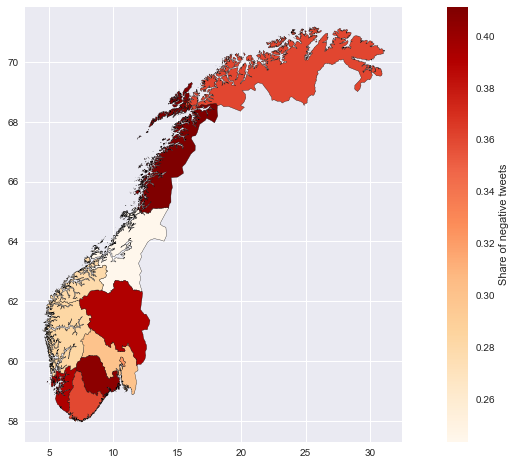

In [34]:
gdf_twitter_yearly_grouped = gdf_twitter_yearly_senti.loc[
    gdf_twitter_yearly_senti['year'] == "2019"
].groupby("NUTS_NAME").first(
).assign(
    non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == "2019"].groupby("NUTS_NAME").sum().label,
    amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == "2019"].groupby("NUTS_NAME").count().label,
    negative_tweets = lambda x: x.amount - x.non_negative_tweets,
    share_negative = lambda x: x.negative_tweets/x.amount
)

gdf_NOnuts3.merge(
    gdf_twitter_yearly_grouped["share_negative"],
    left_on = 'NUTS_NAME',
    right_on = 'NUTS_NAME'
).plot(
    "share_negative",
    legend = True,
    edgecolor = 'black',
    figsize = (16,8),
    cmap ='OrRd',
    legend_kwds={'label': "Share of negative tweets"}
)

In [35]:
gdf_NOnuts3.merge(
        gdf_twitter_yearly_grouped["share_negative"],
        left_on = 'NUTS_NAME',
        right_on = 'NUTS_NAME'
    ).drop(
    columns = {
        "index",
        "NUTS_ID",
        "LEVL_CODE",
        "CNTR_CODE",
        "NAME_LATN",
        "MOUNT_TYPE",
        "URBN_TYPE",
        "COAST_TYPE",
        "FID",
        "NUTS_NAME"
    }
)

,geometry,share_negative
0,"MULTIPOLYGON (((11.83973 59.84077, 11.85370 59...",0.300319
1,"MULTIPOLYGON (((7.09629 59.78278, 7.11059 59.7...",0.391742
2,"MULTIPOLYGON (((5.49146 62.01479, 5.50093 62.0...",0.282524
3,"MULTIPOLYGON (((14.32598 65.11892, 14.27506 65...",0.243399
4,"MULTIPOLYGON (((31.16727 70.38563, 31.16523 70...",0.360360
5,"POLYGON ((8.25170 61.07394, 8.22705 61.08383, ...",0.391429
6,"MULTIPOLYGON (((10.76479 59.82954, 10.77027 59...",0.323283
7,"MULTIPOLYGON (((10.59606 59.17623, 10.59499 59...",0.405738
8,"MULTIPOLYGON (((7.21467 59.67269, 7.23487 59.6...",0.360000
9,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3...",0.279167


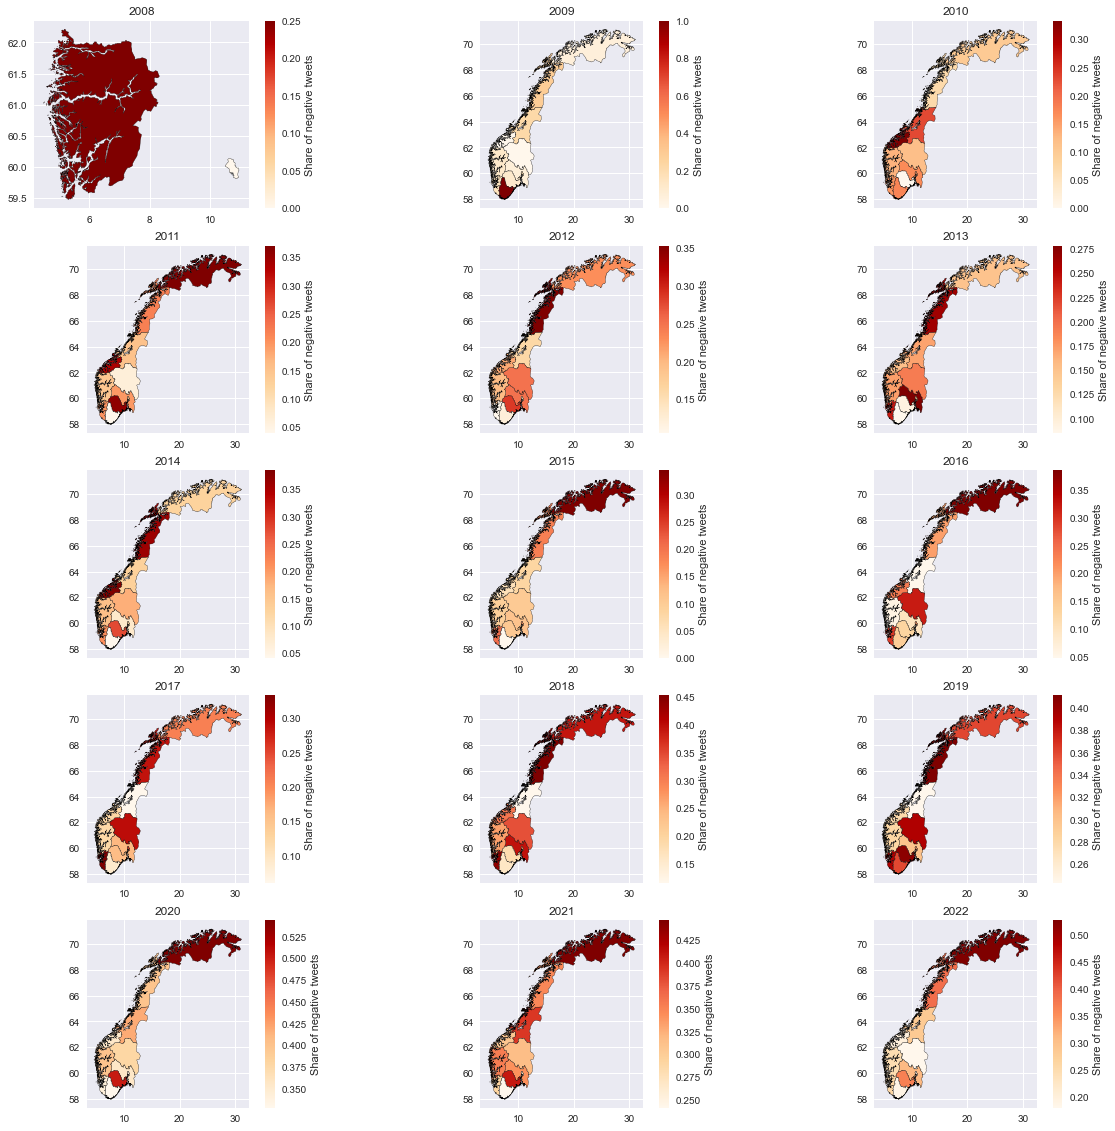

In [36]:
#years = ['2018','2019','2020','2021']
#for year in years:

fig = plt.figure(
    constrained_layout=False,
    figsize=(20,20)
)
gs = fig.add_gridspec(5,3)

row_nr = 0
column_nr = 0
for year in gdf_twitter_yearly_senti.groupby('year').sum().index:
    gdf_twitter_yearly_grouped = gdf_twitter_yearly_senti.loc[
        gdf_twitter_yearly_senti['year'] == year
    ].groupby("NUTS_NAME").first(
    ).assign(
        non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").sum().label,
        amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").count().label,
        negative_tweets = lambda x: x.amount - x.non_negative_tweets,
        share_negative = lambda x: x.negative_tweets/x.amount
    )

    gdf_NOnuts3.merge(
        gdf_twitter_yearly_grouped["share_negative"],
        left_on = 'NUTS_NAME',
        right_on = 'NUTS_NAME'
    ).plot(
        ax=fig.add_subplot(gs[row_nr,column_nr]),
        column = "share_negative",
        edgecolor = 'black',
        cmap ='OrRd',
        legend = True,
        legend_kwds={'label': "Share of negative tweets",
        'orientation': "vertical"},  
    )
    
    plt.title(year)
    #plt.savefig('figures/heat_map_'+str(year)+'.eps')
    #plt.close()
    column_nr += 1
    if column_nr == 3:
        column_nr = 0
        row_nr += 1



In [37]:
for year in gdf_twitter_yearly_senti.groupby('year').sum().index:
    gdf_twitter_yearly_grouped = gdf_twitter_yearly_senti.loc[
        gdf_twitter_yearly_senti['year'] == year
    ].groupby("NUTS_NAME").first(
    ).assign(
        non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").sum().label,
        amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").count().label,
        negative_tweets = lambda x: x.amount - x.non_negative_tweets,
        share_negative = lambda x: x.negative_tweets/x.amount
    )

    gdf_NOnuts3.merge(
        gdf_twitter_yearly_grouped["share_negative"],
        left_on = 'NUTS_NAME',
        right_on = 'NUTS_NAME'
    ).plot(
        column = "share_negative",
        edgecolor = 'black',
        cmap ='OrRd',
        legend = True,
        legend_kwds={'label': "Share of negative tweets",
        'orientation': "vertical"},  
    )
    
    plt.title(year)
    plt.savefig('figures/heat_map_'+str(year)+'.eps')
    plt.close()

<AxesSubplot:>

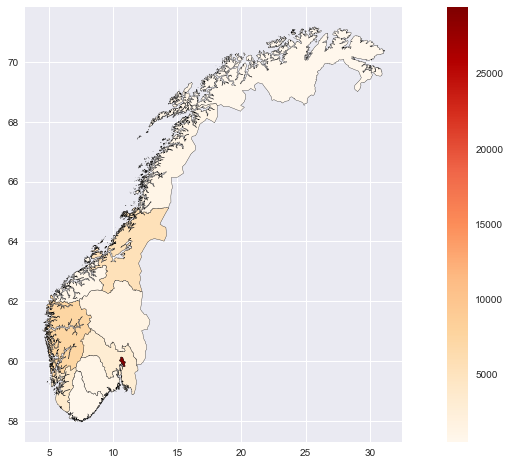

In [38]:
# Add the twitter frequency to the initial shapefile
gdf_plot = gdf_NOnuts3.merge(
    gdf_frequency_county,
    left_on = 'NUTS_NAME',
    right_on = 'NUTS_NAME'
)

# Plot the results
gdf_plot.plot(
    "twitter_frequency",
    legend = True,
    edgecolor = 'black',
    figsize = (16,8),
    cmap ='OrRd'
)
#plt.axis('off')

In [39]:
count = test.groupby('NUTS_NAME').count()

In [40]:
count

,city,created_at,latitude,longitude,label,logits0,logits1,geometry,index_right,index,NUTS_ID
NUTS_NAME,,,,,,,,,,,
Agder,527,527,527,527,527,527,527,527,527,527,527
Innlandet,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484
Møre og Romsdal,897,897,897,897,897,897,897,897,897,897,897
Nordland,983,983,983,983,983,983,983,983,983,983,983
Oslo,29434,29434,29434,29434,29434,29434,29434,29434,29434,29434,29434
Rogaland,3707,3707,3707,3707,3707,3707,3707,3707,3707,3707,3707
Troms og Finnmark,620,620,620,620,620,620,620,620,620,620,620
Trøndelag,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459
Vestfold og Telemark,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036


In [41]:
total = test.groupby('NUTS_NAME').sum()

In [42]:
total

,latitude,longitude,label,logits0,logits1,index_right,index
NUTS_NAME,,,,,,,
Agder,3.073487e+04,3970.536378,424,-631.970835,655.976216,4216,428451
Innlandet,9.043662e+04,16590.366088,1005,-876.590104,1146.396241,7420,1105580
Møre og Romsdal,5.607757e+04,6392.838930,636,-658.362619,782.065911,8073,1346397
Nordland,6.628299e+04,13975.173353,624,-367.851559,534.618754,9830,1476466
Oslo,1.763494e+06,316103.178694,21350,-24590.347128,29151.314731,176604,23311728
Rogaland,2.189131e+05,21524.030916,2509,-2280.300834,2869.571509,3707,2661626
Troms og Finnmark,4.318291e+04,12800.310781,393,-336.622121,417.475996,2480,447020
Trøndelag,3.465005e+05,57597.516394,4050,-5406.957191,6091.336770,16377,3930480
Vestfold og Telemark,6.139072e+04,10130.504688,638,-343.304100,533.947470,7252,824656


In [43]:
new = total.copy()

In [44]:
new['negative_tweets'] = count['label'] - total['label']

In [45]:
new['non_negative_tweets'] = total['label']

In [46]:
new

,latitude,longitude,label,logits0,logits1,index_right,index,negative_tweets,non_negative_tweets
NUTS_NAME,,,,,,,,,
Agder,3.073487e+04,3970.536378,424,-631.970835,655.976216,4216,428451,103,424
Innlandet,9.043662e+04,16590.366088,1005,-876.590104,1146.396241,7420,1105580,479,1005
Møre og Romsdal,5.607757e+04,6392.838930,636,-658.362619,782.065911,8073,1346397,261,636
Nordland,6.628299e+04,13975.173353,624,-367.851559,534.618754,9830,1476466,359,624
Oslo,1.763494e+06,316103.178694,21350,-24590.347128,29151.314731,176604,23311728,8084,21350
Rogaland,2.189131e+05,21524.030916,2509,-2280.300834,2869.571509,3707,2661626,1198,2509
Troms og Finnmark,4.318291e+04,12800.310781,393,-336.622121,417.475996,2480,447020,227,393
Trøndelag,3.465005e+05,57597.516394,4050,-5406.957191,6091.336770,16377,3930480,1409,4050
Vestfold og Telemark,6.139072e+04,10130.504688,638,-343.304100,533.947470,7252,824656,398,638


In [47]:
new = new.drop(columns={
    'latitude',
    'longitude',
    'label',
    'logits0',
    'logits1',
    'index_right',
    'index'
}
)

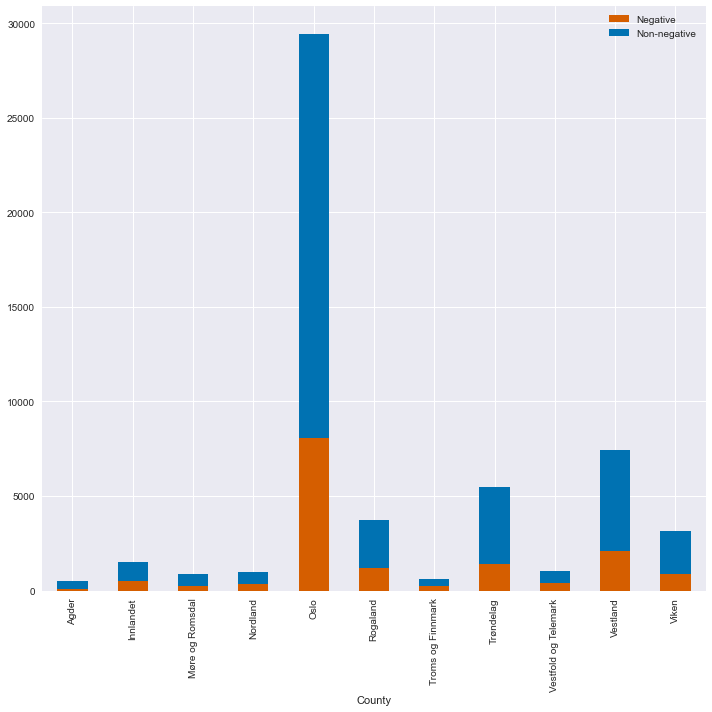

In [48]:
fig, ax = plt.subplots(figsize = (10,10))

new.rename(
    columns={
        "negative_tweets": "Negative",
        "non_negative_tweets": "Non-negative"
    }
).plot.bar(
    ax=ax,
    stacked=True,
    color = [vermilion,blue]
    #title = 'Amount of tweets per county, with sentiment score'
)

plt.tight_layout()
plt.xlabel('County')
plt.savefig('figures/tweets_per_county_sentiment.eps')

In [49]:
new2 = new.copy()

In [50]:
new2['share_negative'] = new['negative_tweets']/(new['negative_tweets'] + new['non_negative_tweets'])
new2['share_non_negative'] = new['non_negative_tweets']/(new['negative_tweets'] + new['non_negative_tweets'])

In [51]:
new2.drop(
    columns={
        'negative_tweets',
        'non_negative_tweets'
    }
).sort_values('share_negative', ascending=False)

,share_negative,share_non_negative
NUTS_NAME,,
Vestfold og Telemark,0.384170,0.615830
Troms og Finnmark,0.366129,0.633871
Nordland,0.365209,0.634791
Rogaland,0.323172,0.676828
Innlandet,0.322776,0.677224
Møre og Romsdal,0.290970,0.709030
Vestland,0.279892,0.720108
Viken,0.276657,0.723343
Oslo,0.274648,0.725352


In [52]:
my_tuple = (1,2)

In [53]:
x = 1342.1203

In [54]:
round(1342.1203, 0)

1342.0

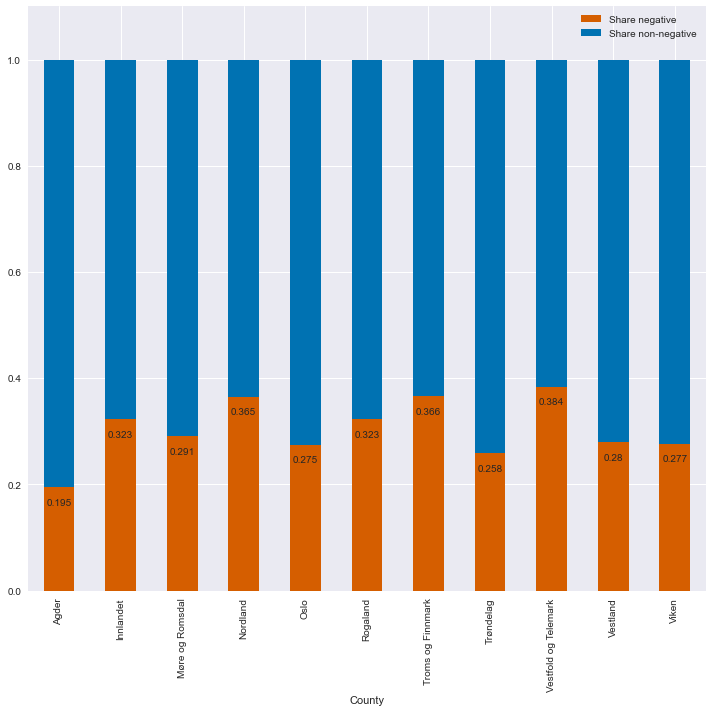

In [55]:
fig, ax=plt.subplots(figsize=(10,10))


new2.drop(
    columns={
        'negative_tweets',
        'non_negative_tweets'
    }
).rename(
    columns={
        "share_negative": "Share negative",
        "share_non_negative": "Share non-negative",
    }
).plot.bar(
    stacked=True,
    ax=ax,
    ylim = [0,1.1],
    color = [vermilion, blue]
)

for container in ax.containers:
    labels = [round(v,3) if v < 0.5 else "" for v in container.datavalues] 
    ax.bar_label(
        container,
        labels = labels,
        padding=-20,
        #color = 'white'
    )

plt.xlabel('County')
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('figures/sentiment_score_county.eps')

### Temporal development per county

In [56]:
gdf_twitter_monthly_senti = gpd.GeoDataFrame(
    df_twitter,
    crs = "EPSG:4326",
    geometry=gpd.points_from_xy(df_twitter.longitude, df_twitter.latitude)
)
gdf_twitter_monthly_senti.index = gdf_twitter_monthly_senti['created_at'].dt.to_period('M')

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [57]:
gdf_twitter_monthly_senti = gdf_twitter_monthly_senti.sjoin(
    gdf_NOnuts3, 
    how="inner", 
    predicate='intersects'
)

In [58]:
df_twitter_monthly_senti = pd.DataFrame(gdf_twitter_monthly_senti.drop(
    columns={
        'username',
        'like_count',
        'quote_count',
        'index',
        'LEVL_CODE',
        'CNTR_CODE',
        'NAME_LATN',
        'MOUNT_TYPE',
        'URBN_TYPE',
        'COAST_TYPE',
        'index_right',
        'text',
        'FID',
        'logits0',
        'logits1',
        'latitude',
        'longitude',
        'geometry',
        'NUTS_ID',
        'Unnamed: 0',
        'loc'
    }
))

In [59]:
df_twitter_monthly_senti

,created_at,label,NUTS_NAME
created_at,,,
2008-12,2008-12-08 07:25:53+00:00,1,Oslo
2008-09,2008-09-06 10:16:18+00:00,1,Oslo
2008-09,2008-09-03 18:58:52+00:00,1,Oslo
2008-08,2008-08-26 05:35:47+00:00,1,Oslo
2009-05,2009-05-26 15:20:20+00:00,1,Oslo
...,...,...,...
2022-03,2022-03-23 19:07:34+00:00,0,Agder
2022-03,2022-03-26 16:02:36+00:00,1,Agder
2022-03,2022-03-31 19:14:46+00:00,1,Agder


In [60]:
df_twitter_monthly_senti = df_twitter_monthly_senti.drop(columns={'created_at'})

In [61]:
df_twitter_monthly_senti

,label,NUTS_NAME
created_at,,
2008-12,1,Oslo
2008-09,1,Oslo
2008-09,1,Oslo
2008-08,1,Oslo
2009-05,1,Oslo
...,...,...
2022-03,0,Agder
2022-03,1,Agder
2022-03,1,Agder


Test case with Agder

In [62]:
df_Agder = df_twitter_monthly_senti.loc[df_twitter_monthly_senti['NUTS_NAME'] == 'Agder']

In [66]:
df_wp_Agder

,Installert effekt [MW],Middelproduksjon [GWh],Antall turbiner,Prisområde
Fylke,,,,
Agder,366.600,1227.980,103.0,8.0
Innlandet,217.500,719.090,54.0,3.0
Møre og Romsdal,187.750,493.180,81.0,9.0
Nordland,411.300,1377.210,92.0,16.0
Rogaland,910.850,3206.563,257.0,36.0
Troms og Finnmark Romsa ja Finnmárku,529.250,1610.350,146.0,32.0
Trøndelag,1578.725,5325.135,436.0,51.0
Vestland,495.000,1613.910,139.0,17.0
Viken,54.000,192.000,15.0,1.0


In [72]:
df_wp_Agder = pd.read_csv(
    'data/norway_wp_nve_250522.tsv', sep = "\t",
    parse_dates = ['Produksjon oppstart']
)

df_wp_Agder = df_wp_Agder.loc[df_wp_Agder['Fylke'] == 'Agder'].groupby(
    'Produksjon oppstart',
    as_index = False
)

In [68]:
pd.read_csv(
    'data/norway_wp_nve_250522.tsv', sep = "\t",
    parse_dates = ['Produksjon oppstart']
).loc[df_wp_Agder['Fylke'] == 'Agder'].groupby(
    'Produksjon oppstart',
    as_index = False
).sum(
).rename(
    columns=
    {
        'Middelproduksjon [GWh]': 'average_generation_GWh',
        'Installert effekt [MW]': 'installed_capacity_MW'
    }
).assign(
    cumulative_annually_average_production_GWh = lambda x: x.average_generation_GWh.cumsum(),
    cumulative_installed_capacity_MW = lambda x: x.installed_capacity_MW.cumsum()
)

#df_wp_Agder['year'] = df_wp_Agder['Produksjon oppstart'].to_numpy().astype('datetime64[Y]')
#time_adjust = pd.Timedelta(pd.to_datetime('10.06.2020', format='%d.%m.%Y') -pd.to_datetime('01.01.2020', format = '%d.%m.%Y'))
#df_wp_Agder['year'] += time_adjust
#df_wp_Agder


,Produksjon oppstart,installed_capacity_MW,average_generation_GWh,Antall turbiner,Prisområde,cumulative_annually_average_production_GWh,cumulative_installed_capacity_MW
0,2012-01-01,71.3,220.00,31.0,2.0,220.00,71.3
1,2019-01-01,215.5,696.00,53.0,4.0,916.00,286.8
2,2021-01-01,79.8,311.98,19.0,2.0,1227.98,366.6


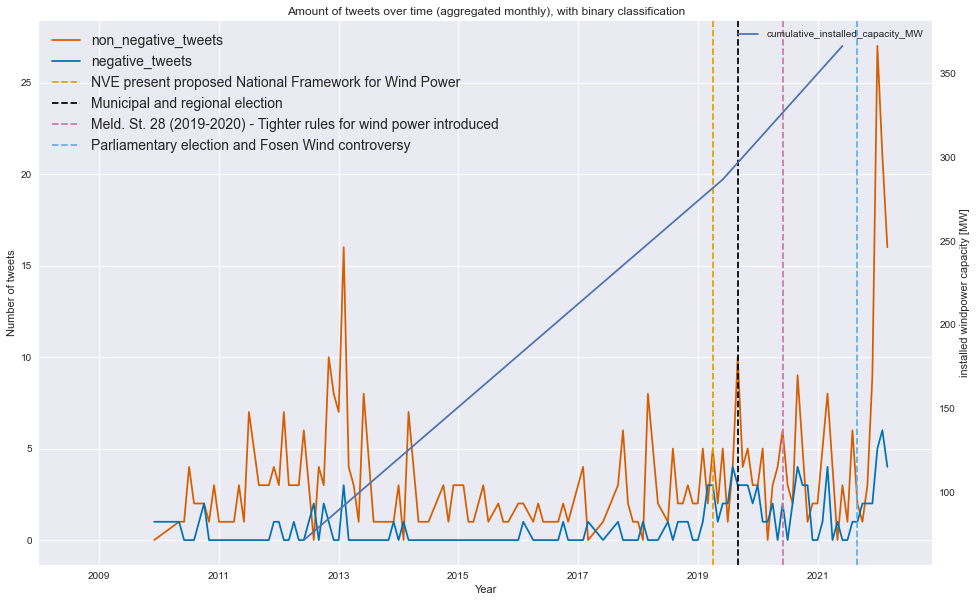

In [76]:
fig, ax = plt.subplots(figsize=(16,10))

ax2 = ax.twinx()
df_Agder.assign(
    non_negative_tweets=lambda x: x.groupby(level=0).sum()
).assign(
    amount=lambda x: x.groupby(level=0).count().label
).assign(
    negative_tweets=lambda x: x.amount - x.non_negative_tweets
).drop(columns={
    'amount',
    'label'
}
  ).sort_values('created_at').plot(
    ax=ax,
    title = 'Amount of tweets over time (aggregated monthly), with binary classification',
    color = [vermilion,blue]
)

ax.axvline(
    dt.datetime(2019, 4, 1),
    color="#E69F00",
    label='NVE present proposed National Framework for Wind Power',
    linestyle = "--"
)

ax.axvline(
    dt.datetime(2019, 9, 1),
    color="#000000",
    label='Municipal and regional election',
    linestyle = "--"
)

ax.axvline(
    dt.datetime(2020, 6, 1),
    color="#CC79A7",
    label='Meld. St. 28 (2019-2020) - Tighter rules for wind power introduced',
    linestyle = "--"
)

ax.axvline(
    dt.datetime(2021, 9, 1),
    color="#56B4E9",
    label='Parliamentary election and Fosen Wind controversy',
    linestyle = "--"
)

df_wp_Agder = pd.read_csv(
    'data/norway_wp_nve_250522.tsv', sep = "\t",
    parse_dates = ['Produksjon oppstart']
)

df_wp_Agder = df_wp_Agder.loc[df_wp_Agder['Fylke'] == 'Agder'].groupby(
    'Produksjon oppstart',
    as_index = False
).sum(
).rename(
    columns=
    {
        'Middelproduksjon [GWh]': 'average_generation_GWh',
        'Installert effekt [MW]': 'installed_capacity_MW'
    }
).assign(
    cumulative_annually_average_production_GWh = lambda x: x.average_generation_GWh.cumsum(),
    cumulative_installed_capacity_MW = lambda x: x.installed_capacity_MW.cumsum()
)

df_wp_Agder['year'] = df_wp_Agder['Produksjon oppstart'].to_numpy().astype('datetime64[Y]')
time_adjust = pd.Timedelta(pd.to_datetime('10.06.2020', format='%d.%m.%Y') -pd.to_datetime('01.01.2020', format = '%d.%m.%Y'))
df_wp_Agder['year'] += time_adjust
df_wp_Agder.plot(
        ax=ax2,
        y = ['cumulative_installed_capacity_MW'], #, 'average_generation_GWh'],
        x = 'year'
)

ax.set_xlim([dt.date(2008, 1, 1), dt.date(2022, 12, 12)])
ax2.grid(None)
ax2.set_ylabel('installed windpower capacity [MW]')


ax.legend(fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Number of tweets')
plt.savefig('figures/agder_test.png')

In [ ]:
counties = ['Agder',
            'Innlandet',
            'Møre og Romsdal',
            'Nordland',
            'Oslo',
            'Rogaland',
           'Troms og Finnmark',
            'Trøndelag',
            'Vestfold og Telemark',
            'Vestland',
            'Viken'
           ]

In [ ]:
row_nr = 0
column_nr = 0
fig = plt.figure(
    constrained_layout=False,
    figsize=(30,15)
)
gs = fig.add_gridspec(4,3, wspace=0.4, hspace = 1)

for county in counties:
    df_twitter_monthly_senti.loc[df_twitter_monthly_senti['NUTS_NAME'] == county].assign(
        non_negative_tweets=lambda x: x.groupby(level=0).sum()
    ).assign(
        amount=lambda x: x.groupby(level=0).count().label
    ).assign(
        negative_tweets=lambda x: x.amount - x.non_negative_tweets
    ).drop(columns={
        'amount',
        'label'
    }
      ).rename(
    columns={
        "negative_tweets": "Negative",
        "non_negative_tweets": "Non-negative"
    }
    ).sort_values(
        'created_at'
    ).plot(
        ax=fig.add_subplot(gs[row_nr,column_nr]),
        title = county,
        color = [blue,vermilion]
    )
    column_nr += 1
    if column_nr == 3:
        column_nr = 0
        row_nr += 1
    plt.xlabel('Year')
    plt.ylabel('Amount of tweets')
    ax.axvline(
    dt.datetime(2019, 4, 1),
    color="#E69F00",
    label='NVE present proposed National Framework for Wind Power',
    linestyle = "--"
)

plt.savefig('figures/temporal_all_counties.eps')

In [ ]:
for county in counties:
    df_twitter_monthly_senti.loc[df_twitter_monthly_senti['NUTS_NAME'] == county].assign(
        non_negative_tweets=lambda x: x.groupby(level=0).sum()
    ).assign(
        amount=lambda x: x.groupby(level=0).count().label
    ).assign(
        negative_tweets=lambda x: x.amount - x.non_negative_tweets
    ).drop(columns={
        'amount',
        'label'
    }
      ).rename(
        columns={
            "negative_tweets": "Negative",
            "non_negative_tweets": "Non-negative"
        }
    ).sort_values(
        'created_at'
    ).plot(
        title = county,
        color = [blue,vermilion] 
    )
    #plt.tight_layout()
    plt.xlabel('Year')
    plt.ylabel('Number of tweets')
    plt.savefig('figures/temporal_new_'+str(county.replace(" ", ""))+'.eps')
    #plt.close()
    

## Wild testing

In [ ]:
df_twitter_yearly = pd.DataFrame(df_twitter.copy())
df_twitter_yearly.index = df_twitter_yearly['created_at'].dt.to_period('Y')

In [ ]:
years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

In [ ]:
a_list = []
for year in years:
    x = [year, df_twitter_yearly.loc[year].label.mean()]
    a_list.append(x)

In [ ]:
df_year_averages = pd.DataFrame(a_list, columns=['year','share_non_negative'])

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))

#plt.rcParams['font.size'] = '12'

df_year_averages.assign(
    share_negative=lambda x: 1-x.share_non_negative
).set_index(
    'year'
).plot.bar(
    ax=ax,
    stacked=True,
    color = [blue,vermilion]
)
#plt.legend(bbox_to_anchor=(1.0, 1.0))

for container in ax.containers:
    labels = [round(v,3) if v < 0.4 else "" for v in container.datavalues] 
    ax.bar_label(
        container,
        labels = labels,
        padding=-20,
        #color = 'white'
    )


plt.ylim([0,1.08])
#plt.tight_layout()
plt.xlabel('Year')
plt.savefig('figures/share_negative_time.eps')

In [ ]:
df_year_averages

In [ ]:
df_year_averages.assign(
    share_negative=lambda x: 1-x.share_non_negative
).set_index(
    'year'
).plot.bar(
    stacked=True,
    color = [blue,vermilion]
)

In [ ]:
fig = plt.figure(
    constrained_layout=False,
    figsize=(12,6)
)
gs = fig.add_gridspec(1,1, wspace=0.4, hspace = 1)

df_twitter_monthly_senti.loc[df_twitter_monthly_senti['NUTS_NAME'] == county].assign(
        non_negative_tweets=lambda x: x.groupby(level=0).sum()
    ).assign(
        amount=lambda x: x.groupby(level=0).count().label
    ).assign(
        negative_tweets=lambda x: x.amount - x.non_negative_tweets
    ).drop(columns={
        'amount',
        'label'
    }
      ).rename(
        columns={
            "negative_tweets": "Negative",
            "non_negative_tweets": "Non-negative"
        }
    ).plot(
        ax=fig.add_subplot(gs[0,0]),
        title = county,
        color = [blue,vermilion] 
    )
    

plt.xlabel('Year')
plt.ylabel('Number of tweets')

In [ ]:
gdf_twitter_yearly_senti

In [ ]:
#gdf_spatio_temporal = 
gdf_twitter_yearly_senti.groupby(
    ['NUTS_NAME','year']
).count(
).assign(
        non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").sum().label,
        amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").count().label,
        negative_tweets = lambda x: x.amount - x.non_negative_tweets,
        share_negative = lambda x: x.negative_tweets/x.amount
    )

In [ ]:
gdf_spatio_temporal

In [ ]:
for year in gdf_twitter_yearly_senti.groupby('year').sum().index:
    gdf_twitter_yearly_grouped = gdf_twitter_yearly_senti.loc[
        gdf_twitter_yearly_senti['year'] == year
    ].groupby("NUTS_NAME").first(
    ).assign(
        non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").sum().label,
        amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").count().label,
        negative_tweets = lambda x: x.amount - x.non_negative_tweets,
        share_negative = lambda x: x.negative_tweets/x.amount
    )